In [14]:
import getopt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from func import norm_2D, plot

In [15]:
# Initialise values
mu = []
sgm = []
pw = [] # Prior probability
col = ['r', 'b']

mu.append(np.array([[3],[6]]))
mu.append(np.array([[3],[-2]]))
sgm.append(np.array([[0.5, 0], [0, 2]]))
sgm.append(np.array([[2, 0], [0, 2]]))
pw.append(np.array([0.5, 0.5]))

x1=np.arange(-10,10.5,0.5).reshape(-1,1)
x2=np.arange(-9,10.5,0.5).reshape(-1,1)
x_1, x_2 = np.meshgrid(x1, x2)

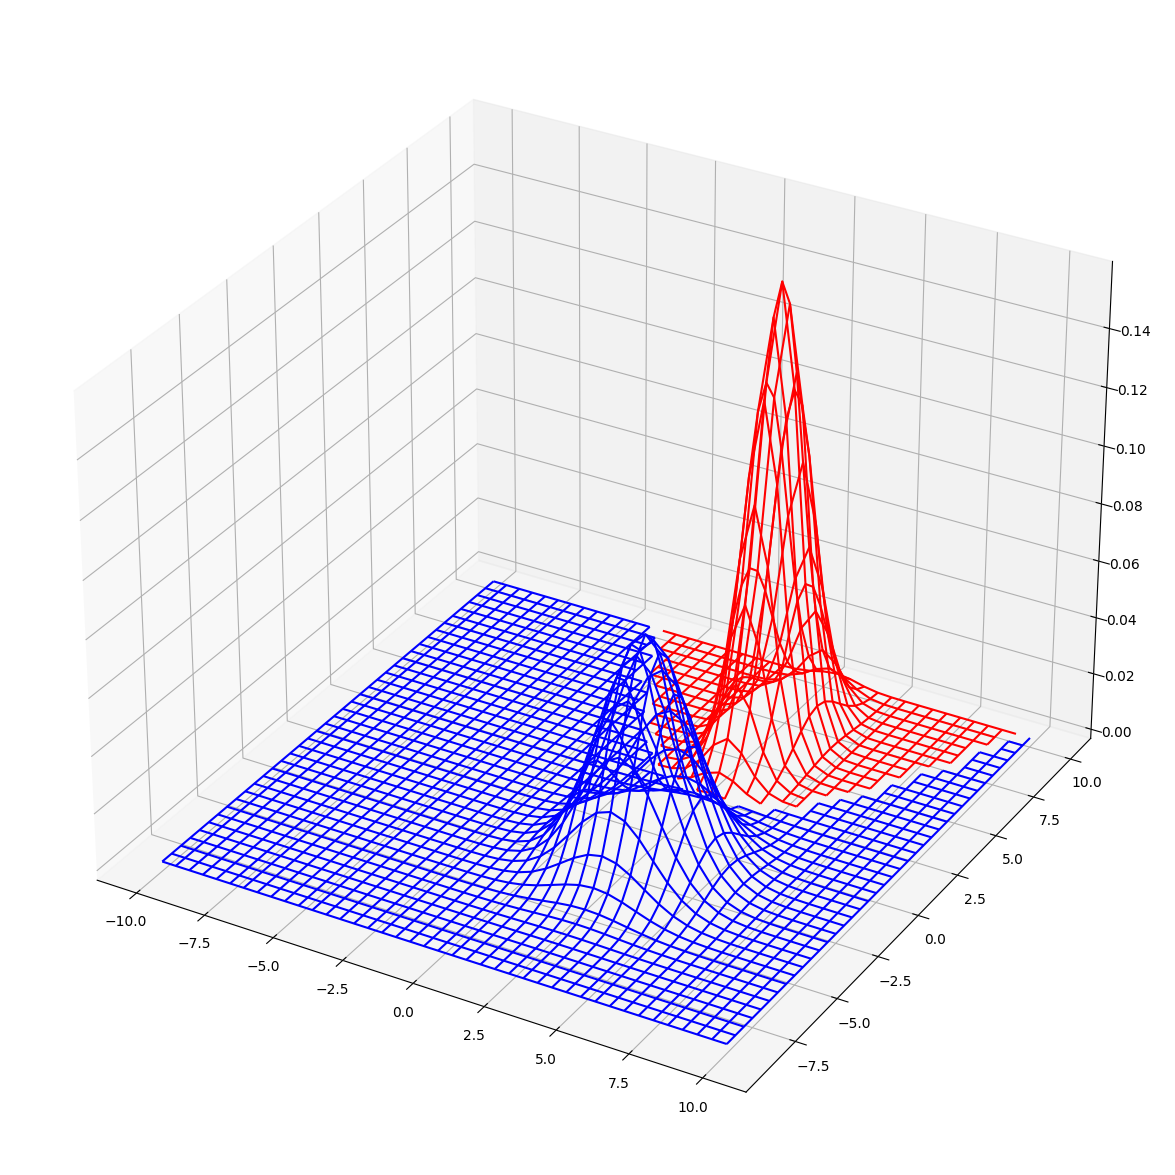

In [16]:
# a) and b) class-conditional PDF for class ω_1 and ω_2 (p(x|ω_i))
pxw = []
for i in range(len(mu)):
    pxw.append(norm_2D(mu[i], sgm[i], x_1, x_2))
plot(pxw, x_1, x_2, col, True)

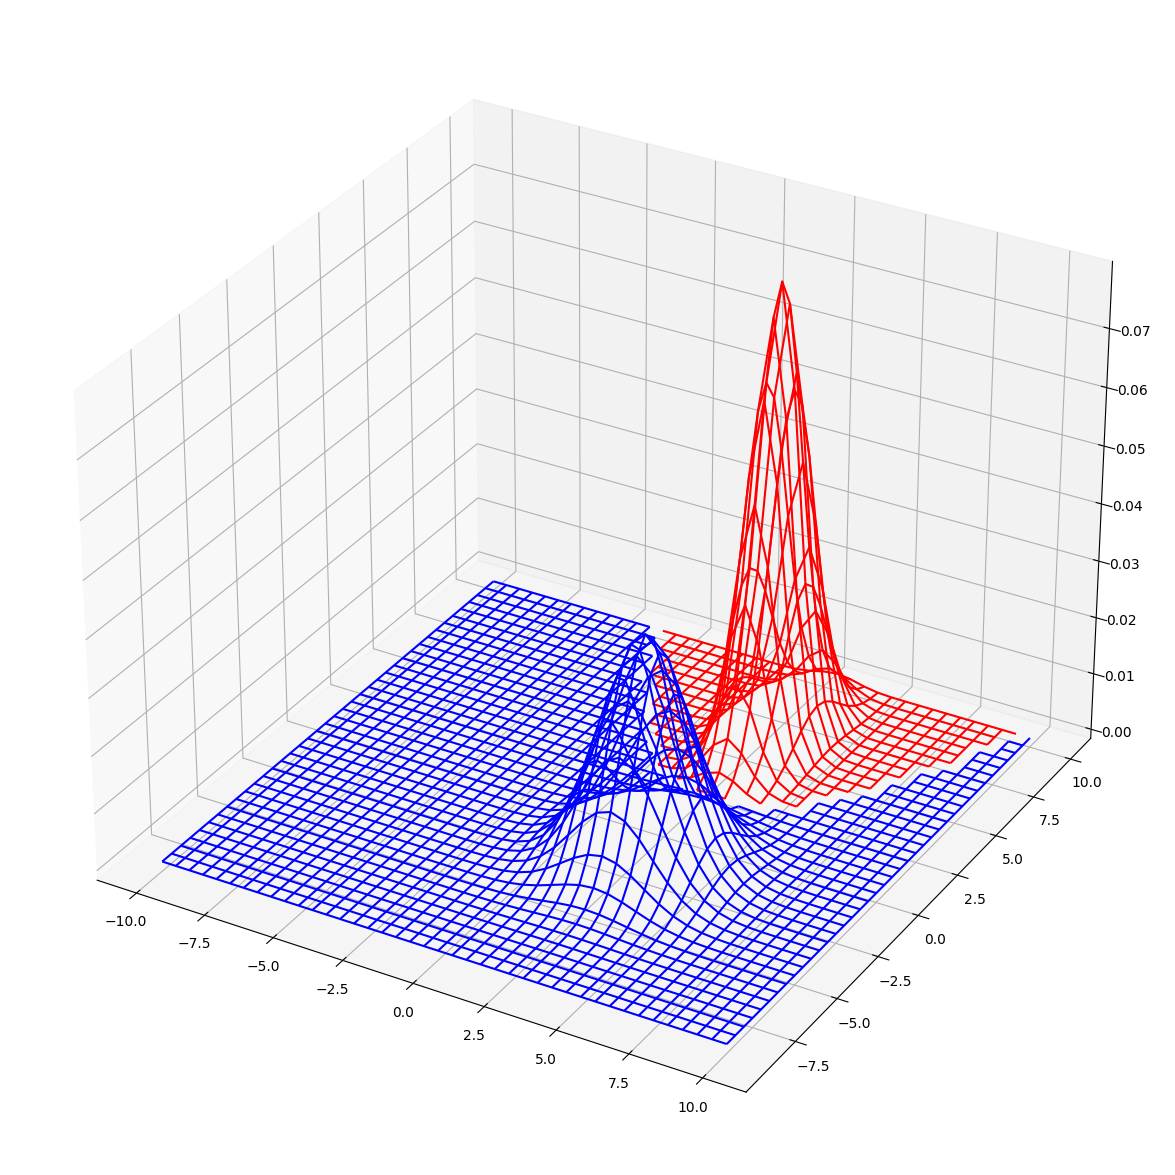

In [17]:
# c) p(ω_i)*(p(x|ω_i))
pwxw = []
for i in range(len(pxw)):
    pwxw.append(pxw[i]*pw[0][i])
plot(pwxw, x_1, x_2, col, True)

d) The decision boundary is shown between the red and blue graphs.

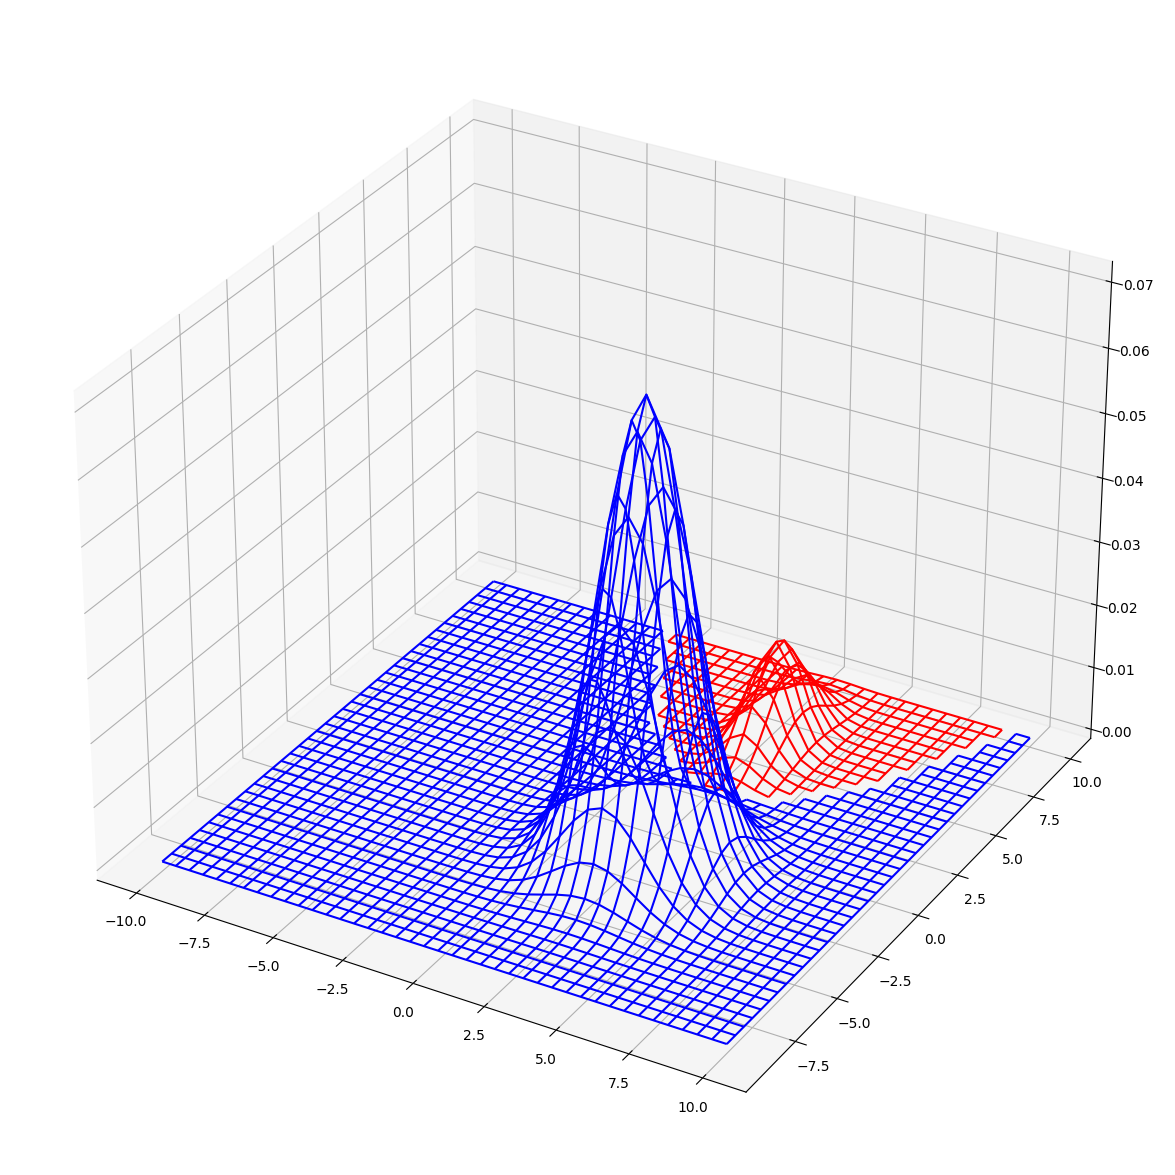

In [18]:
# e)
pw.append(np.array([0.1, 0.9])) # Prior probability
pwxw_new = []
for i in range(len(pxw)):
    pwxw_new.append(pxw[i]*pw[1][i])
plot(pwxw_new, x_1, x_2, col, True)

There is clearly a difference for the decision boundary when changing the priori probabilities.

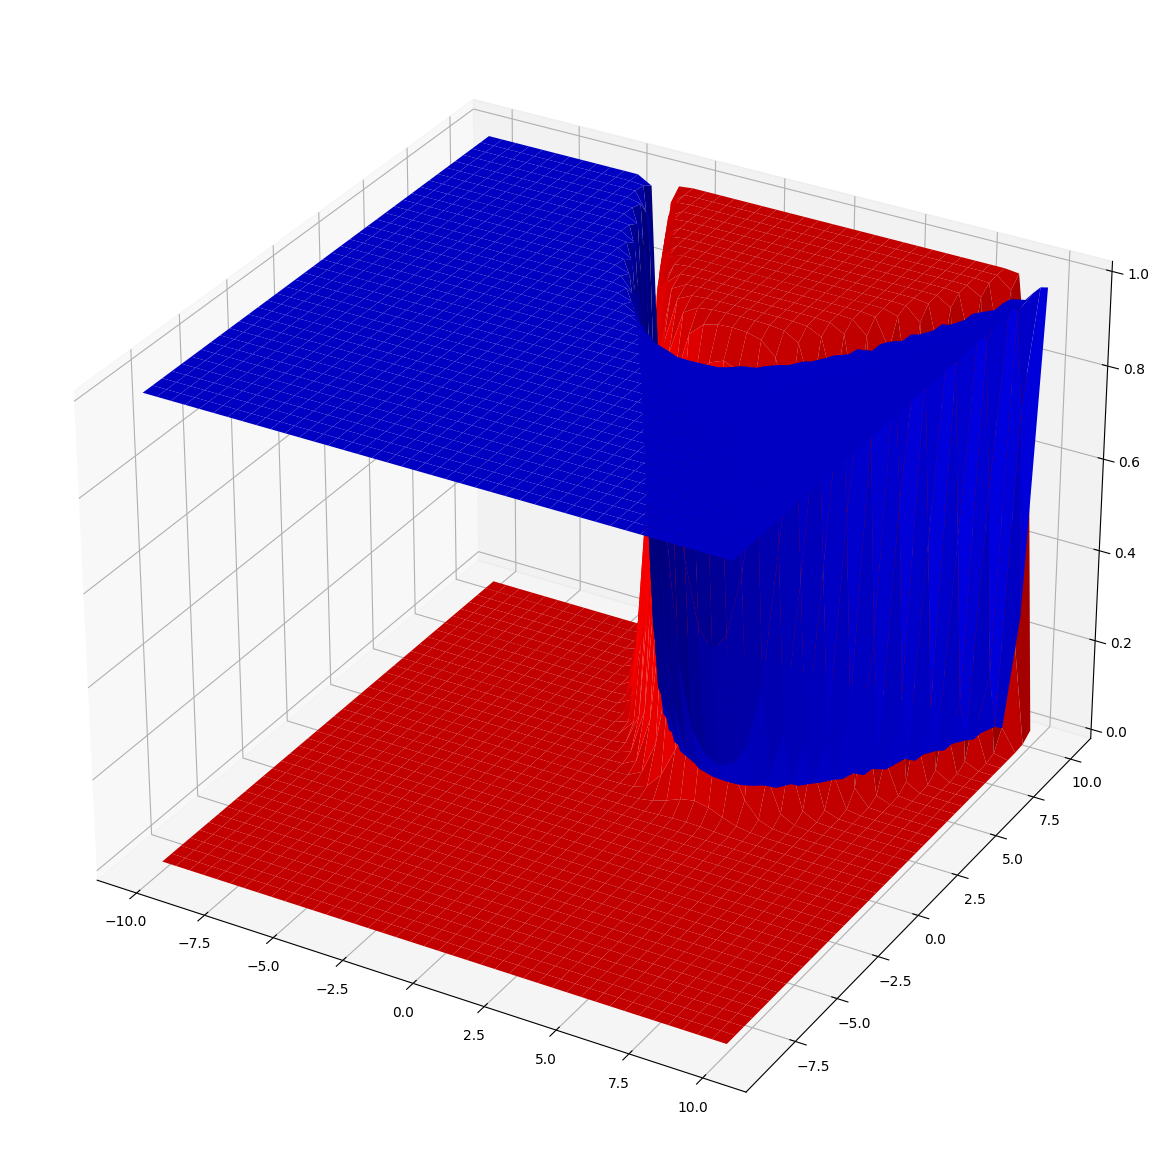

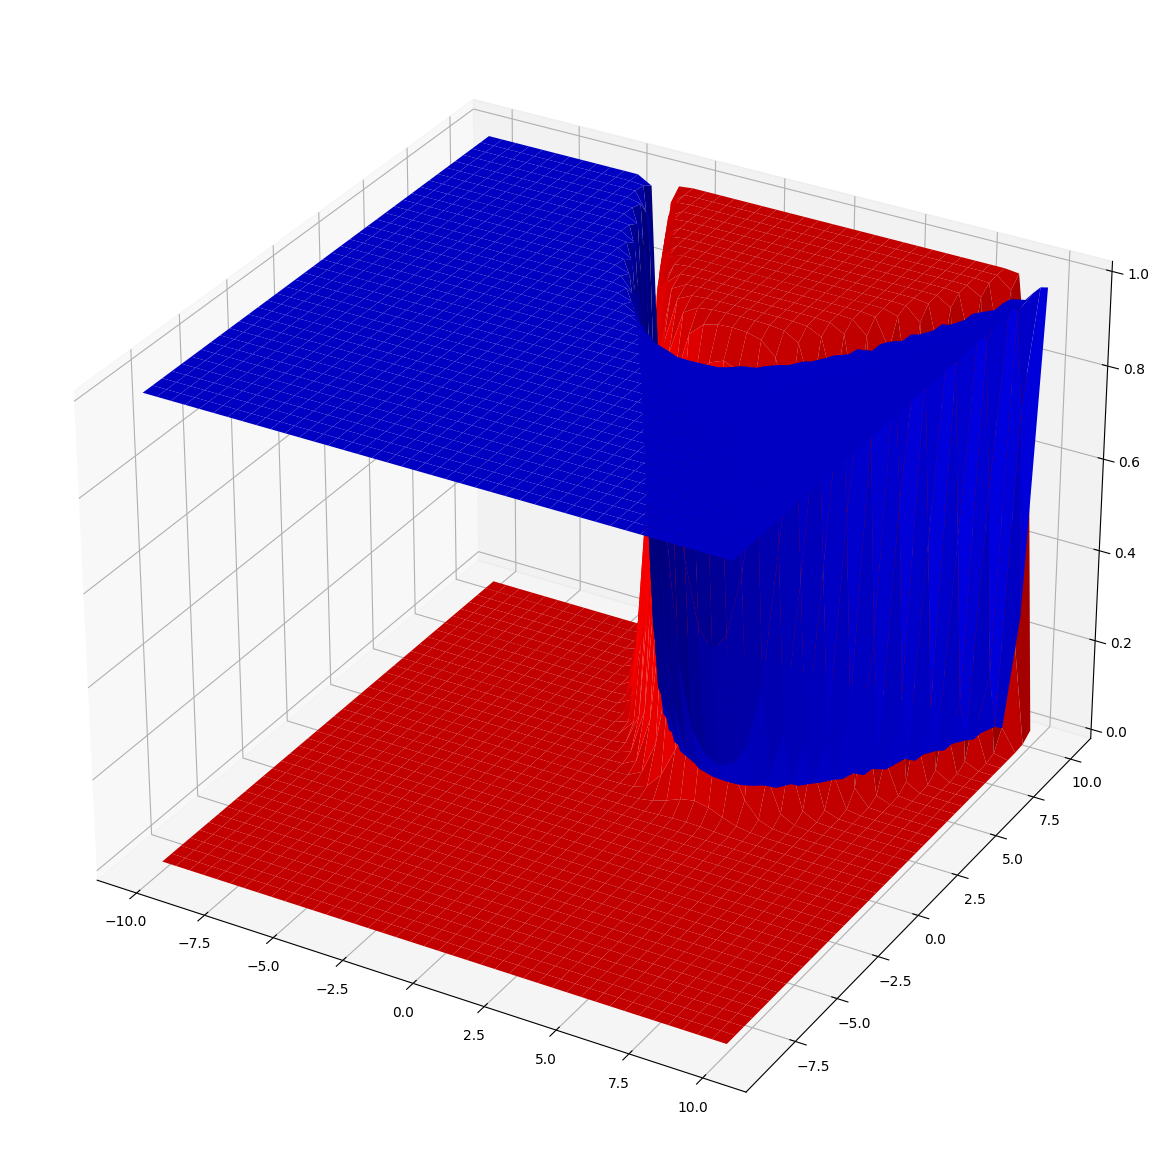

In [19]:
# f) 
px = [0,0]
for i in range(len(pxw)):
    px[0] += pw[0][i]*pxw[i]
    px[1] += pw[1][i]*pxw[i]

pwx = [[],[]]
for i in range(len(pxw)):
    pwx[0].append(pxw[i]*pw[0][i]/px[0])
    pwx[1].append(pxw[i]*pw[0][i]/px[0])

plot(pwx[0],x_1, x_2, col, False)
plot(pwx[1],x_1, x_2, col, False)


In [20]:
with open("func.py", "r") as file:
    content = file.read()
    print(content)

import sys
import numpy as np
import matplotlib.pyplot as plt


def norm_2D(my, Smg, x_1, x_2):
    [n1, d1] = np.shape(x_1)
    p = np.zeros_like(x_1)
    for i in np.arange(0, n1):
        for j in np.arange(0, d1):
            x = np.array([[x_1[i, j]], [x_2[i, j]]])
            p[i, j] = 1 / ((2*np.pi)**(2/2)*(np.linalg.det(Smg))
                           ** (1/2)) * np.exp(-1/2*np.transpose(x - my)@np.linalg.inv(Smg)@(x-my))
    return p


def plot(p, x_1, x_2, col, db):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    if db:
        ax.plot_wireframe(x_1, x_2, np.where(
            p[1] < p[0], p[0], np.nan), color=col[0])
        ax.plot_wireframe(x_1, x_2, np.where(
            p[1] >= p[0], p[1], np.nan), color=col[1])
    else:
        for i in range(len(p)):
            ax.plot_surface(x_1, x_2, p[i], color=col[i])
    plt.show()

